The first step in every data analysis process is to - understanding what question is driving the analysis and that is the first thing that we should be focussed on - define the goals of analysis 

In [1]:
from pyspark.sql import SparkSession

spark = SparkSession.builder.getOrCreate()

In [2]:
print(spark.version)

2.4.0


In [3]:
import sys

print(sys.version_info)

sys.version_info(major=3, minor=6, micro=5, releaselevel='final', serial=0)


### Loading data

In [4]:
df = spark.read.csv('2017_StPaul_MN_Real_Estate.csv', inferSchema=True, header=True)
print(df.columns)

['No.', 'MLSID', 'StreetNumberNumeric', 'streetaddress', 'STREETNAME', 'PostalCode', 'StateOrProvince', 'City', 'SalesClosePrice', 'LISTDATE', 'LISTPRICE', 'LISTTYPE', 'OriginalListPrice', 'PricePerTSFT', 'FOUNDATIONSIZE', 'FENCE', 'MapLetter', 'LotSizeDimensions', 'SchoolDistrictNumber', 'DAYSONMARKET', 'offmarketdate', 'Fireplaces', 'RoomArea4', 'roomtype', 'ROOF', 'RoomFloor4', 'PotentialShortSale', 'PoolDescription', 'PDOM', 'GarageDescription', 'SQFTABOVEGROUND', 'Taxes', 'RoomFloor1', 'RoomArea1', 'TAXWITHASSESSMENTS', 'TAXYEAR', 'LivingArea', 'UNITNUMBER', 'YEARBUILT', 'ZONING', 'STYLE', 'ACRES', 'CoolingDescription', 'APPLIANCES', 'backonmarketdate', 'ROOMFAMILYCHAR', 'RoomArea3', 'EXTERIOR', 'RoomFloor3', 'RoomFloor2', 'RoomArea2', 'DiningRoomDescription', 'BASEMENT', 'BathsFull', 'BathsHalf', 'BATHQUARTER', 'BATHSTHREEQUARTER', 'Class', 'BATHSTOTAL', 'BATHDESC', 'RoomArea5', 'RoomFloor5', 'RoomArea6', 'RoomFloor6', 'RoomArea7', 'RoomFloor7', 'RoomArea8', 'RoomFloor8', 'Bedroo

<font color='red'>The parameter `inferSchema` helps to infer data types of the features automatically. If it is not set to true, Spark assign `String` data types to all the variables<>

### Verifying data load

In [5]:
def check_load(df, num_records, num_columns):
    # Takes a dataframe and compares record and column counts to input
    # Message to return if the critera below aren't met
    message = 'Validation Failed'
    
    # Check number of records
    if num_records == df.count():
        
        # Check number of columns
        if num_columns == len(df.columns):
            
            # Success message
            message = 'Validation Passed'
            
    return message

# Print the data validation message
print(check_load(df, 5000, 74))

Validation Passed


### Verifying data types

In [6]:
validation_dict = {'ASSESSMENTPENDING': 'string',
 'AssessedValuation': 'double',
 'AssociationFee': 'bigint',
 'AssumableMortgage': 'string',
 'SQFTBELOWGROUND': 'bigint'}

In [7]:
# create list of actual dtypes to check
actual_dtypes_list = df.dtypes
print(actual_dtypes_list)

# Iterate through the list of actual dtypes tuples
for attribute_tuple in actual_dtypes_list:
    
    # Check if column name is dictionary of expected dtypes
    col_name = attribute_tuple[0]
    if col_name in validation_dict:
        
        # Compare attribute types
        col_type = attribute_tuple[1]
        if col_type == validation_dict[col_name]:
            print(col_name + ' has expected dtype.')

[('No.', 'int'), ('MLSID', 'string'), ('StreetNumberNumeric', 'int'), ('streetaddress', 'string'), ('STREETNAME', 'string'), ('PostalCode', 'int'), ('StateOrProvince', 'string'), ('City', 'string'), ('SalesClosePrice', 'int'), ('LISTDATE', 'string'), ('LISTPRICE', 'int'), ('LISTTYPE', 'string'), ('OriginalListPrice', 'int'), ('PricePerTSFT', 'double'), ('FOUNDATIONSIZE', 'int'), ('FENCE', 'string'), ('MapLetter', 'string'), ('LotSizeDimensions', 'string'), ('SchoolDistrictNumber', 'string'), ('DAYSONMARKET', 'int'), ('offmarketdate', 'string'), ('Fireplaces', 'int'), ('RoomArea4', 'string'), ('roomtype', 'string'), ('ROOF', 'string'), ('RoomFloor4', 'string'), ('PotentialShortSale', 'string'), ('PoolDescription', 'string'), ('PDOM', 'int'), ('GarageDescription', 'string'), ('SQFTABOVEGROUND', 'int'), ('Taxes', 'int'), ('RoomFloor1', 'string'), ('RoomArea1', 'string'), ('TAXWITHASSESSMENTS', 'double'), ('TAXYEAR', 'int'), ('LivingArea', 'int'), ('UNITNUMBER', 'string'), ('YEARBUILT', 'i

### EDA

In [8]:
columns = ['FOUNDATIONSIZE',
 'DAYSONMARKET',
 'Fireplaces',
 'PDOM',
 'SQFTABOVEGROUND',
 'Taxes',
 'TAXWITHASSESSMENTS',
 'TAXYEAR',
 'LivingArea',
 'YEARBUILT',
 'ACRES',
 #'backonmarketdate',
 'BathsFull',
 'BathsHalf',
 'BATHQUARTER',
 'BATHSTHREEQUARTER',
 'BATHSTOTAL',
 'Bedrooms',
 'SQFTBELOWGROUND',
 'AssociationFee',
 'AssessedValuation']

In [9]:
# Name and value of col with max corr
corr_max = 0
corr_max_col = columns[0]

# Loop to check all columns contained in list
for col in columns:
    # Check the correlation of a pair of columns
    corr_val = df.corr(col, 'SalesClosePrice')
    # Logic to compare corr_max with current corr_val
    if corr_val > corr_max:
        # Update the column name and corr value
        corr_max = corr_val
        corr_max_col = col

print(corr_max_col)

LivingArea


<li><font color='red'>How to uppercase the column names in Spark dataframes?</font></li>
<ol><font color='green'>from pyspark.sql import functions as F 
    <br></br>
    df.select([F.col(x).alias(x.lower()) for x in df.columns]).show()</font></ol>
<li><font color='red'>How to change the column data types in Spark dataframes</font></li>

### Data Visualization

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

#### density plot

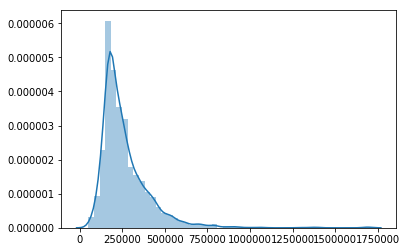

[Row(skewness(LISTPRICE)=2.790448093916559)]


In [11]:
# Select a single column and sample and convert to pandas
sample_df = df.select(['LISTPRICE']).sample(False, 0.5, 42)
pandas_df = sample_df.toPandas()

# Plot distribution of pandas_df and display plot
sns.distplot(pandas_df)
plt.show()

# Import skewness function
from pyspark.sql.functions import skewness

# Compute and print skewness of LISTPRICE
print(df.agg({'LISTPRICE': 'skewness'}).collect())

#### linear model plot

Creating linear model plots helps us visualize if variables have relationships with the dependent variable. If they do they are good candidates to include in our analysis. If they don't it doesn't mean that we should throw them out, it means we may have to process or wrangle them before they can be used.

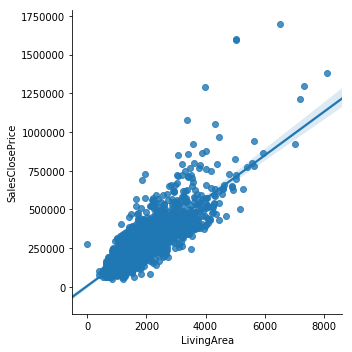

In [12]:
# Select a the relevant columns and sample
sample_df = df.select(['SalesClosePrice', 'LivingArea']).sample(False, 0.5, 42)

# Convert to pandas dataframe
pandas_df = sample_df.toPandas()

# Linear model plot of pandas_df
sns.lmplot(x='LivingArea', y='SalesClosePrice', data=pandas_df)
plt.show()

### Where can data go bad?

<ol>
    <li>Recorded wrong</li>
    <li>Unique events</li>
    <li>Formatted incorrectly</li>
    <li>Duplications</li>
    <li>Missing data</li>
    <li>Non relevant data</li>
</ol>

## Data Wrangling with Spark functions

In [13]:
df_small = df.select('StreetNumberNumeric', 'Fireplaces', 'LotSizeDimensions', 'LISTTYPE', 'ACRES')
df_small.show(30)

+-------------------+----------+--------------------+---------------+-----+
|StreetNumberNumeric|Fireplaces|   LotSizeDimensions|       LISTTYPE|ACRES|
+-------------------+----------+--------------------+---------------+-----+
|              11511|         0|             279X200|Exclusive Right| 1.28|
|              11200|         0|             100x140|Exclusive Right| 0.32|
|               8583|         0|             120x296|Exclusive Right|0.822|
|               9350|         1|             208X208|Exclusive Right| 0.94|
|               2915|         1|             116x200|Exclusive Right|  0.0|
|               3604|         1|              50x150|Exclusive Right|0.172|
|               9957|         0|              common|Exclusive Right| 0.05|
|               9934|         0|              common|Exclusive Right| 0.05|
|               9926|         0|              common|Exclusive Right| 0.05|
|               9928|         0|              common|Exclusive Right| 0.05|
|           

In [14]:
cols_to_drop = ['StreetNumberNumeric', 'LotSizeDimensions']
df_small = df_small.drop(*cols_to_drop)

In [15]:
df_small.show()

+----------+---------------+-----+
|Fireplaces|       LISTTYPE|ACRES|
+----------+---------------+-----+
|         0|Exclusive Right| 1.28|
|         0|Exclusive Right| 0.32|
|         0|Exclusive Right|0.822|
|         1|Exclusive Right| 0.94|
|         1|Exclusive Right|  0.0|
|         1|Exclusive Right|0.172|
|         0|Exclusive Right| 0.05|
|         0|Exclusive Right| 0.05|
|         0|Exclusive Right| 0.05|
|         0|Exclusive Right| 0.05|
|         0|Exclusive Right| 0.05|
|         0|Exclusive Right| 0.05|
|         0|Exclusive Right| 0.05|
|         0|Exclusive Right| 0.05|
|         1|Exclusive Right|1.661|
|         0|Exclusive Right| 0.05|
|         0|Exclusive Right| 0.05|
|         0|Exclusive Right| 0.05|
|         0|Exclusive Right| 0.05|
|         0|Exclusive Right| 0.05|
+----------+---------------+-----+
only showing top 20 rows

